In [1]:
import pandas as pd
import seaborn as sns

In [2]:
d = pd.read_csv("twowayanova.txt", sep="\t")
d

,Genotype,1_year,2_year,3_year
0,A,1.53,4.08,6.69
1,A,1.83,3.84,5.97
2,A,1.38,3.96,6.33
3,B,3.60,5.70,8.55
4,B,2.94,5.07,7.95
5,B,4.02,7.20,8.94
6,C,3.99,6.09,10.02
7,C,3.30,5.88,9.63
8,C,4.41,6.51,10.38
9,D,3.75,5.19,11.40


In [3]:
# reshape the d dataframe suitable for statsmodels package 
# you do not need to reshape if your data is already in stacked format. 
# Compare d and d_melt tables for detail understanding 
d_melt = pd.melt(d, id_vars=['Genotype'], value_vars=['1_year', '2_year', '3_year'])
# replace column names
d_melt.columns = ['Genotype', 'years', 'value']
d_melt

,Genotype,years,value
0,A,1_year,1.53
1,A,1_year,1.83
2,A,1_year,1.38
3,B,1_year,3.60
4,B,1_year,2.94
5,B,1_year,4.02
6,C,1_year,3.99
7,C,1_year,3.30
8,C,1_year,4.41
9,D,1_year,3.75


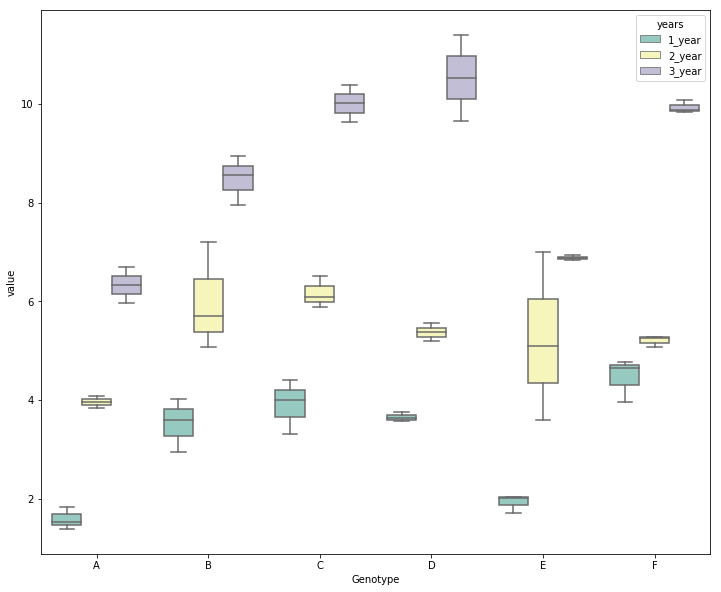

In [4]:
# generate a boxplot to see the data distribution by genotypes and years. Using boxplot, we can easily detect the 
# differences between different groups
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.boxplot(x="Genotype", y="value", hue="years", data=d_melt, palette="Set3") 
plt.show()

In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [6]:
# Ordinary Least Squares (OLS) model
# C(Genotype):C(years) represent interaction term
model = ols('value ~ C(Genotype) + C(years) + C(Genotype):C(years)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Genotype),58.551733,5.0,32.748581,1.931655e-12
C(years),278.925633,2.0,390.014868,4.006243e-25
C(Genotype):C(years),17.122967,10.0,4.788525,2.230094e-04
Residual,12.873000,36.0,NaN,NaN


- Bây giờ, chúng ta biết rằng sự khác biệt về kiểu gen và thời gian (năm) có ý nghĩa thống kê, nhưng ANOVA không cho biết kiểu gen và thời gian (năm) khác nhau đáng kể với nhau. Để biết các cặp kiểu gen và thời gian (năm) khác nhau đáng kể, thực hiện nhiều phân tích so sánh cặp bằng cách sử dụng Tukey HSD test.

In [7]:
# load packages
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=d_melt['value'], groups=d_melt['Genotype'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  A      B      2.04   -1.5094 5.5894 False 
  A      C     2.7333   -0.816 6.2827 False 
  A      D      2.56   -0.9894 6.1094 False 
  A      E      0.72   -2.8294 4.2694 False 
  A      F     2.5733   -0.976 6.1227 False 
  B      C     0.6933   -2.856 4.2427 False 
  B      D      0.52   -3.0294 4.0694 False 
  B      E     -1.32   -4.8694 2.2294 False 
  B      F     0.5333   -3.016 4.0827 False 
  C      D    -0.1733  -3.7227 3.376  False 
  C      E    -2.0133  -5.5627 1.536  False 
  C      F     -0.16   -3.7094 3.3894 False 
  D      E     -1.84   -5.3894 1.7094 False 
  D      F     0.0133   -3.536 3.5627 False 
  E      F     1.8533   -1.696 5.4027 False 
--------------------------------------------


In [18]:
# load packages
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=d_melt['value'], groups=d_melt['years'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff lower  upper  reject
-------------------------------------------
1_year 2_year  2.1467  1.0864 3.2069  True 
1_year 3_year  5.5217  4.4614 6.5819  True 
2_year 3_year  3.375   2.3147 4.4353  True 
-------------------------------------------


In [11]:
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(d_melt['value'], d_melt['years'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff lower  upper  reject
-------------------------------------------
1_year 2_year  2.1467  1.0864 3.2069  True 
1_year 3_year  5.5217  4.4614 6.5819  True 
2_year 3_year  3.375   2.3147 4.4353  True 
-------------------------------------------


In [17]:
import scipy.stats as stats
w, pvalue = stats.levene(d['1_year'], d['2_year'], d['3_year'])
print(w, pvalue)

3.7640414132406605 0.02987100822975102


In [22]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
for name, grouped_df in d_melt.groupby('Genotype'):
    print('Genotype {}'.format(name), pairwise_tukeyhsd(grouped_df['value'], grouped_df['years'], alpha=0.05))

Genotype A Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff lower  upper  reject
-------------------------------------------
1_year 2_year   2.38   1.7396 3.0204  True 
1_year 3_year   4.75   4.1096 5.3904  True 
2_year 3_year   2.37   1.7296 3.0104  True 
-------------------------------------------
Genotype B Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff lower upper reject
-----------------------------------------
1_year 2_year   2.47   0.563 4.377  True 
1_year 3_year   4.96   3.053 6.867  True 
2_year 3_year   2.49   0.583 4.397  True 
-----------------------------------------
Genotype C Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff lower  upper  reject
-------------------------------------------
1_year 2_year   2.26   1.1811 3.3389  True 
1_year 3_year   6.11   5.0311 7.1889  True 
2_year 3_year   3.85   2.7711 4.9289  True 
-------------------------------------------
Genotype D Multiple Comparison of 

In [23]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
for name, grouped_df in d_melt.groupby('years'):
    print('years {}'.format(name), pairwise_tukeyhsd(grouped_df['value'], grouped_df['Genotype'], alpha=0.05))

years 1_year Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  A      B      1.94    0.8801  2.9999  True 
  A      C      2.32    1.2601  3.3799  True 
  A      D      2.07    1.0101  3.1299  True 
  A      E      0.34   -0.7199  1.3999 False 
  A      F      2.88    1.8201  3.9399  True 
  B      C      0.38   -0.6799  1.4399 False 
  B      D      0.13   -0.9299  1.1899 False 
  B      E      -1.6   -2.6599 -0.5401  True 
  B      F      0.94   -0.1199  1.9999 False 
  C      D     -0.25   -1.3099  0.8099 False 
  C      E     -1.98   -3.0399 -0.9201  True 
  C      F      0.56   -0.4999  1.6199 False 
  D      E     -1.73   -2.7899 -0.6701  True 
  D      F      0.81   -0.2499  1.8699 False 
  E      F      2.54    1.4801  3.5999  True 
---------------------------------------------
years 2_year Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject